<a href="https://colab.research.google.com/github/saikrishna1108/Introduction-to-Machine-Learning/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/Housing.csv"
data = pd.read_csv(path)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
np.random.seed(0)
train, test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [5]:
def preprocess(data,variables):
  new_data = data[variables].replace({'yes':1,'no':0})
  x = new_data.iloc[:,1:]
  m = x.shape[0]
  y = np.array(new_data.iloc[:,0],dtype=np.float128).reshape(m,1)
  x = np.array(x,dtype=np.float128)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))
  return x,y


In [6]:
def loss_value(x,y,theta):
  m = len(y)
  h= x.dot(theta)
  error = np.subtract(h,y)
  square_error = np.square(error)
  sum = (1/ (2*m)) * np.sum(square_error)
  return sum
def gradient_value(x_train,x_test,y_train,y_test,theta,iterations,learning_rate):
  n = len(y_train)
  cost_history1 = np.zeros(iterations)
  cost_history2 = np.zeros(iterations)
  for i in range(iterations):
    h = x_train.dot(theta)
    error = np.subtract(h,y_train)
    diff = (1/(n))*(x_train.transpose()).dot(error)
    theta = theta - learning_rate * diff
    cost_history1[i] = loss_value(x_train,y_train,theta)
    cost_history2[i] = loss_value(x_test,y_test,theta)
  return theta,cost_history1,cost_history2

Problem 1A:
Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [29]:
variables = ["price","area", "bedrooms", "bathrooms", "stories", "parking"]
x_train1a,y_train1a = preprocess(train,variables)
x_test1a,y_test1a = preprocess(test,variables)



In [31]:
theta = np.zeros(6).reshape(6,1)
iterations = 9500
learning_rate= 0.00000001
theta1a,t_cost1a,v_cost1a = gradient_value(x_train1a,x_test1a,y_train1a,y_test1a,theta,iterations,learning_rate)
print(theta1a)
print(t_cost1a[-1])
print(v_cost1a[-1])

[[34.42]
 [861.79]
 [129.84]
 [75.78]
 [116.50]
 [26.91]]
1689710547306.8643
1609099784242.538


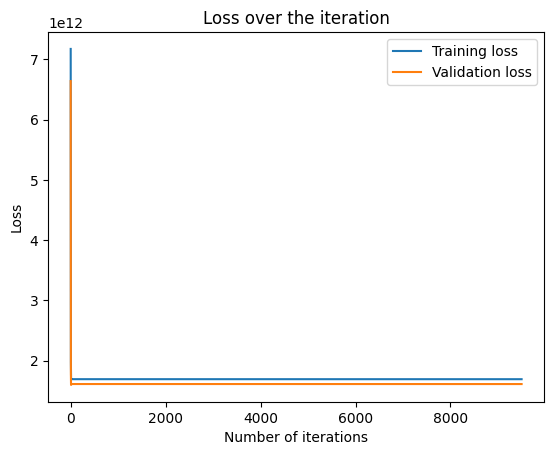

In [32]:
plt.plot([x for x in range(iterations)],t_cost1a,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost1a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

Problem 1B:

Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [34]:
variables = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train1b,y_train1b = preprocess(train,variables)
x_test1b,y_test1b = preprocess(test,variables)
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.000000001
theta1b,t_cost1b,v_cost1b= gradient_value(x_train1b,x_test1b,y_train1b,y_test1b,theta,iterations,learning_rate)
print(theta1b)
print(t_cost1b[-1])
print(v_cost1b[-1])


[[0.68]
 [861.91]
 [2.47]
 [1.38]
 [2.10]
 [0.59]
 [0.24]
 [0.38]
 [0.11]
 [0.51]
 [0.54]
 [0.26]]
1690102354386.6458
1609467428517.4346


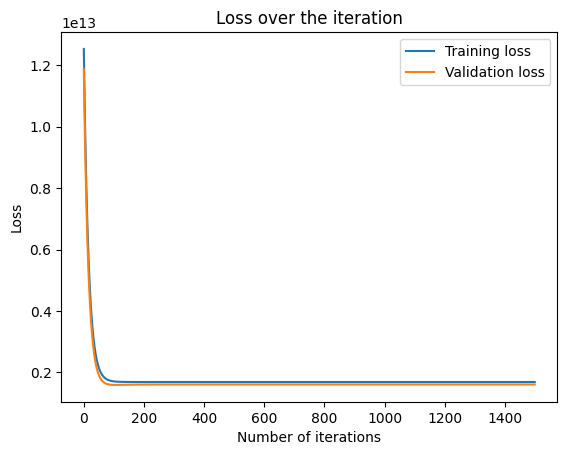

In [35]:
plt.plot([x for x in range(iterations)],t_cost1b,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost1b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

Problem 2A:
Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
standard = StandardScaler()

In [37]:
x_test_scaler = scaler.fit_transform(x_test1a)
x_train_scaler = scaler.fit_transform(x_train1a)
x_test_normalised = standard.fit_transform(x_test1a)
x_train_normalised = standard.fit_transform(x_train1a)

In [38]:
theta = np.zeros(6).reshape(6,1)
iterations = 1500
learning_rate= 0.08
theta2a,t_cost2a,v_cost2a = gradient_value(x_train_scaler, x_test_scaler,y_train1a,y_test1a,theta,iterations,learning_rate)
print(theta2a)
print(t_cost2a[-1])
print(v_cost2a[-1])

[[0.00]
 [6579669.66]
 [5341917.28]
 [2690958.85]
 [1503838.68]
 [1202988.48]]
1052546600409.4962
1637995960598.248


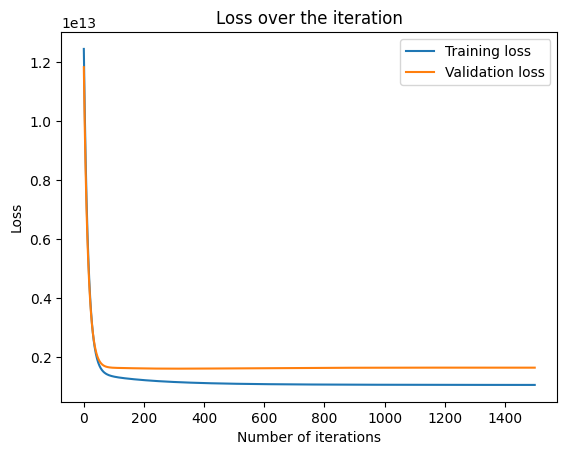

In [39]:
plt.plot([x for x in range(iterations)],t_cost2a,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [40]:
theta = np.zeros(6).reshape(6,1)
iterations = 2500
learning_rate= 0.01
theta2a1,t_cost2a1,v_cost2a1 = gradient_value(x_train_normalised,  x_test_normalised,y_train1a,y_test1a,theta,iterations,learning_rate)
print(theta2a1)
print(t_cost2a1[-1])
print(v_cost2a1[-1])

[[0.00]
 [729932.37]
 [79334.92]
 [641264.68]
 [463855.74]
 [287331.17]]
12260544218074.309
11609071556690.264


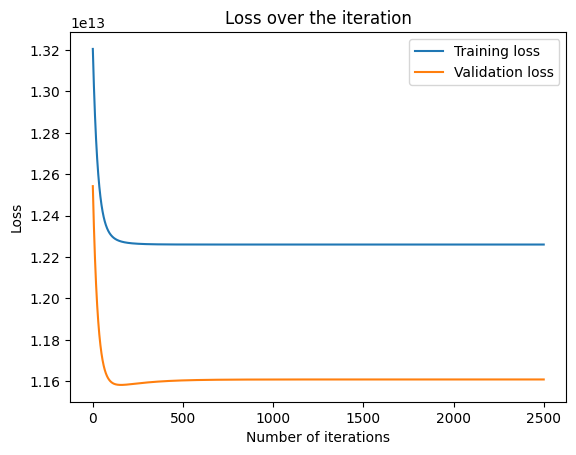

In [41]:
plt.plot([x for x in range(iterations)],t_cost2a1,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2a1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()
plt.show()

Problem 2b
Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. Experiment between normalizing and not normalizing the output!

Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results. Experiment between normalizing and not normalizing the output!

In [42]:
x_test_scaler2b = scaler.fit_transform(x_test1b)
x_train_scaler2b = scaler.fit_transform(x_train1b)
x_test_normalised2b = standard.fit_transform(x_test1b)
x_train_normalised2b = standard.fit_transform(x_train1b)

In [43]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
theta2b,t_cost2b,v_cost2b = gradient_value(x_train_scaler2b, x_test_scaler2b,y_train1b,y_test1b,theta,iterations,learning_rate)
print(theta2b)
print(t_cost2b[-1])
print(v_cost2b[-1])

[[0.00]
 [1623780.98]
 [2107363.69]
 [1447199.30]
 [1526338.15]
 [2101852.48]
 [490548.91]
 [542680.00]
 [725633.11]
 [1137102.45]
 [1157862.78]
 [608460.35]]
800624334883.8073
822114334743.38


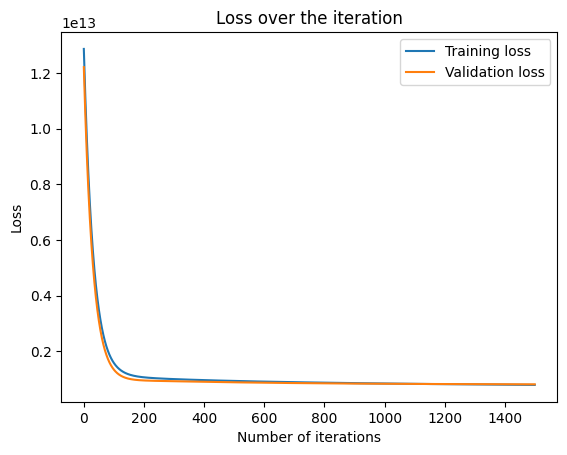

In [44]:
plt.plot([x for x in range(iterations)],t_cost2b,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [45]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
theta2b1,t_cost2b1,v_cost2b1 = gradient_value(x_train_normalised2b, x_test_normalised2b,y_train1b,y_test1b,theta,iterations,learning_rate)
print(theta2b)
print(t_cost2b1[-1])
print(v_cost2b1[-1])

[[0.00]
 [1623780.98]
 [2107363.69]
 [1447199.30]
 [1526338.15]
 [2101852.48]
 [490548.91]
 [542680.00]
 [725633.11]
 [1137102.45]
 [1157862.78]
 [608460.35]]
12073743725060.732
11400604785229.504


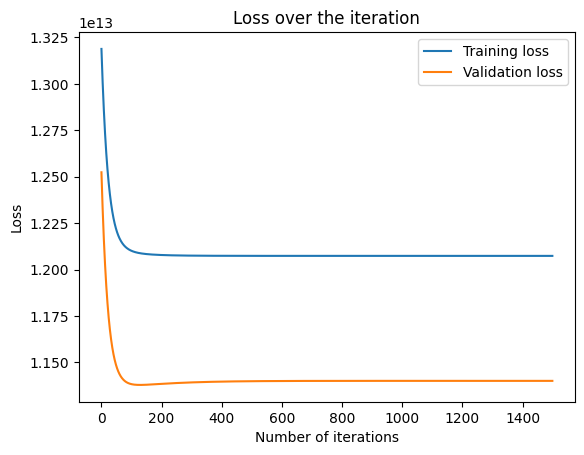

In [46]:
plt.plot([x for x in range(iterations)],t_cost2b1,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2b1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [47]:
y_test_scaler2b = scaler.fit_transform(y_test1b)
y_train_scaler2b = scaler.fit_transform(y_train1b)
y_test_normalised2b = standard.fit_transform(y_test1b)
y_train_normalised2b = standard.fit_transform(y_train1b)

In [48]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
theta2by,t_cost2by,v_cost2by = gradient_value(x_train_scaler2b, x_test_scaler2b,y_train_scaler2b,y_test_scaler2b,theta,iterations,learning_rate)
print(theta2by)
print(t_cost2by[-1])
print(v_cost2by[-1])

[[0.00]
 [0.11]
 [0.09]
 [0.12]
 [0.11]
 [0.09]
 [0.05]
 [0.03]
 [0.05]
 [0.09]
 [0.09]
 [0.06]]
0.005140830689728252
0.00556431225369896


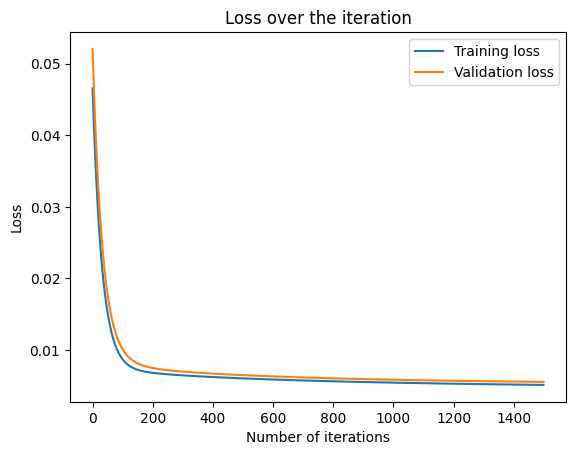

In [49]:
plt.plot([x for x in range(iterations)],t_cost2by,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2by,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [50]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
theta2by1,t_cost2by1,v_cost2by1 = gradient_value(x_train_normalised2b, x_test_normalised2b,y_train_normalised2b,y_test_normalised2b,theta,iterations,learning_rate)
print(theta2by1)
print(t_cost2by1[-1])
print(v_cost2by1[-1])

[[0.00]
 [0.29]
 [0.04]
 [0.31]
 [0.20]
 [0.11]
 [0.08]
 [0.08]
 [0.11]
 [0.21]
 [0.12]
 [0.14]]
0.1650771794487914
0.16621769232616973


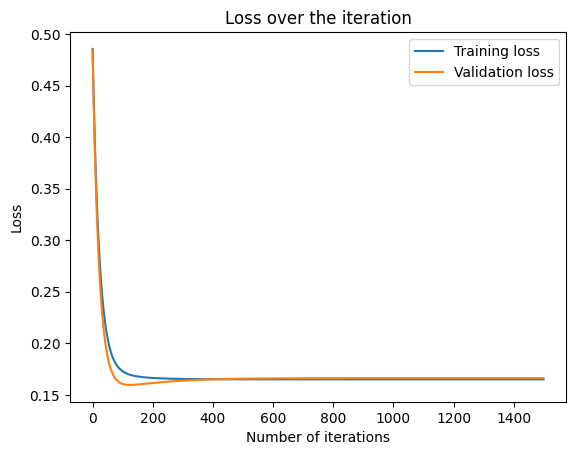

In [51]:
plt.plot([x for x in range(iterations)],t_cost2by1,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2by1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

In [52]:
def loss_value_penalty(x,y,theta,alpha):
  m = len(y)
  h= x.dot(theta)
  error = np.subtract(h,y)
  square_error = np.square(error)
  sum = (1/ (2*m)) *( np.sum(square_error) + alpha * np.sum(np.square(theta)))
  return sum
def gradient_value_penalty(x_train,x_test,y_train,y_test,theta,iterations,learning_rate,alpha):
  n = len(y_train)
  cost_history1 = np.zeros(iterations)
  cost_history2 = np.zeros(iterations)
  for i in range(iterations):
    h = x_train.dot(theta)
    error = np.subtract(h,y_train)
    diff = (1/(n))*((x_train.transpose()).dot(error) + alpha * theta)
    theta = theta - learning_rate * diff
    cost_history1[i] = loss_value_penalty(x_train,y_train,theta,alpha)
    cost_history2[i] = loss_value(x_test,y_test,theta)
  return theta,cost_history1,cost_history2

In [62]:
theta = np.zeros(6).reshape(6,1)
iterations = 3500
learning_rate= 0.05
alpha = 1
theta2ap,t_cost2ap,v_cost2ap = gradient_value_penalty(x_train_scaler, x_test_scaler,y_train1a,y_test1a,theta,iterations,learning_rate,alpha)
print(theta2ap)
print(t_cost2ap[-1])
print(v_cost2ap[-1])

[[0.00]
 [6436169.87]
 [5239161.53]
 [2633536.61]
 [1597084.84]
 [1283848.48]]
1146384502005.7988
1606412784545.8433


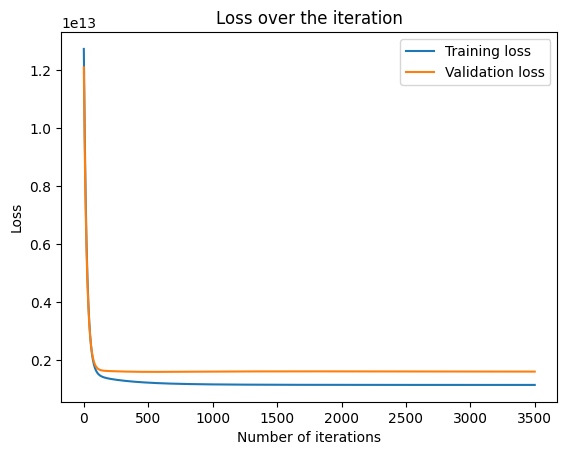

In [63]:
plt.plot([x for x in range(iterations)],t_cost2ap,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2ap,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 500
learning_rate= 0.09
alpha = 8
theta2a1p,t_cost2a1p,v_cost2a1p = gradient_value_penalty(x_train_normalised,  x_test_normalised,y_train1a,y_test1a,theta,iterations,learning_rate,alpha)
print(theta2a1)
print(t_cost2a1p[-1])
print(v_cost2a1p[-1])

[[0.00]
 [729932.37]
 [79334.92]
 [641264.68]
 [463855.74]
 [287331.17]]
12271833166766.531
11606089587275.068


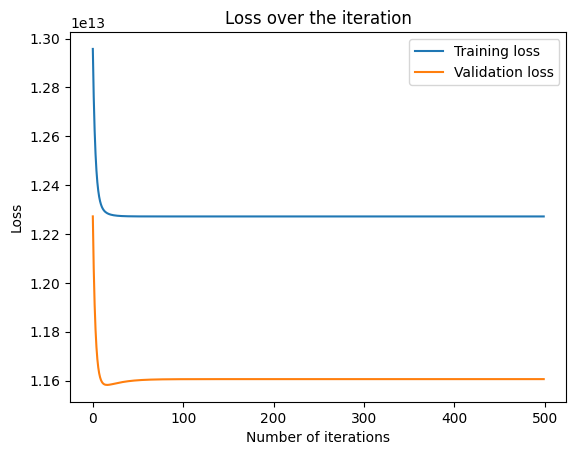

In [ ]:
plt.plot([x for x in range(iterations)],t_cost2a1p,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2a1p,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

3b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

In [64]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
alpha = 3
theta2bp,t_cost2bp,v_cost2bp = gradient_value_penalty(x_train_scaler2b, x_test_scaler2b,y_train1b,y_test1b,theta,iterations,learning_rate,alpha)
print(theta2bp)
print(t_cost2bp[-1])
print(v_cost2bp[-1])

[[0.00]
 [1579913.78]
 [2062988.20]
 [1396927.91]
 [1503757.23]
 [2120109.67]
 [491740.90]
 [556345.57]
 [701633.55]
 [1136646.79]
 [1143633.11]
 [611750.26]]
875818936811.3531
820252070464.4497


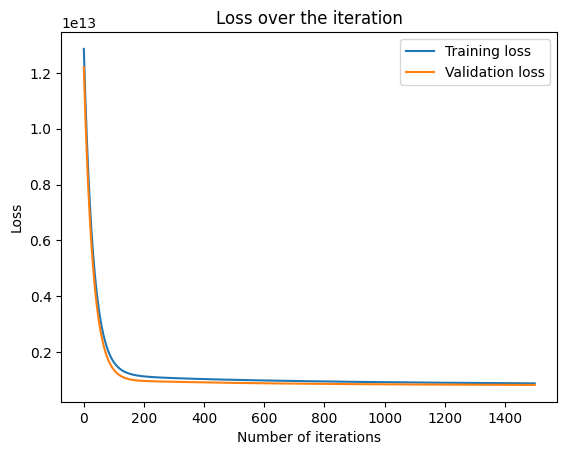

In [65]:
plt.plot([x for x in range(iterations)],t_cost2bp,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2bp,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [66]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
alpha = 2
theta2b1p,t_cost2b1p,v_cost2b1p = gradient_value_penalty(x_train_normalised2b, x_test_normalised2b,y_train1b,y_test1b,theta,iterations,learning_rate,alpha)
print(theta2b1p)
print(t_cost2b1p[-1])
print(v_cost2b1p[-1])

[[0.00]
 [530954.89]
 [74363.57]
 [576340.52]
 [366141.91]
 [210299.97]
 [146410.05]
 [144640.55]
 [204013.65]
 [399035.84]
 [222491.63]
 [255229.05]]
12076402404238.37
11400069674190.635


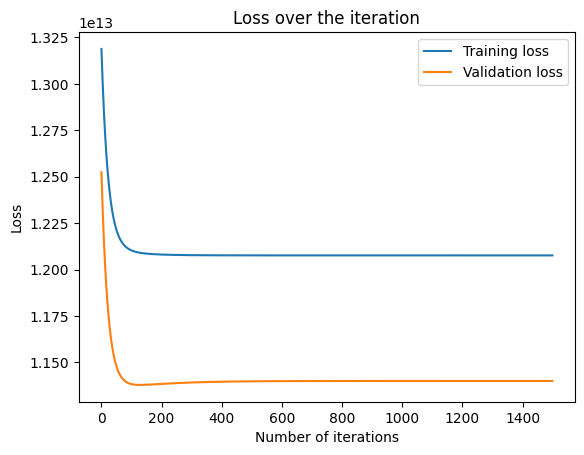

In [67]:
plt.plot([x for x in range(iterations)],t_cost2b1p,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2b1p,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [69]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
alpha = 1
theta2byp,t_cost2byp,v_cost2byp = gradient_value_penalty(x_train_scaler2b, x_test_scaler2b,y_train_scaler2b,y_test_scaler2b,theta,iterations,learning_rate,alpha)
print(theta2byp)
print(t_cost2byp[-1])
print(v_cost2byp[-1])

[[0.00]
 [0.11]
 [0.09]
 [0.12]
 [0.11]
 [0.09]
 [0.05]
 [0.03]
 [0.05]
 [0.09]
 [0.09]
 [0.06]]
0.005249836460158036
0.005583845552512935


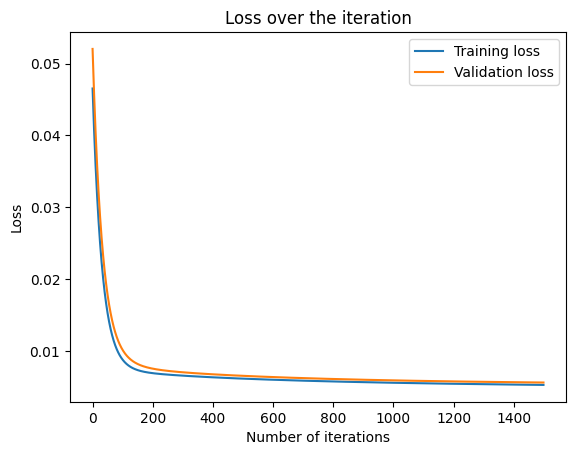

In [70]:
plt.plot([x for x in range(iterations)],t_cost2byp,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2byp,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [71]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
learning_rate= 0.01
alpha = 1
theta2by1p,t_cost2by1p,v_cost2by1p = gradient_value_penalty(x_train_normalised2b, x_test_normalised2b,y_train_normalised2b,y_test_normalised2b,theta,iterations,learning_rate,alpha)
print(theta2by1p)
print(t_cost2by1p[-1])
print(v_cost2by1p[-1])

[[0.00]
 [0.29]
 [0.04]
 [0.31]
 [0.20]
 [0.11]
 [0.08]
 [0.08]
 [0.11]
 [0.21]
 [0.12]
 [0.14]]
0.1654598792781836
0.1661349499304313


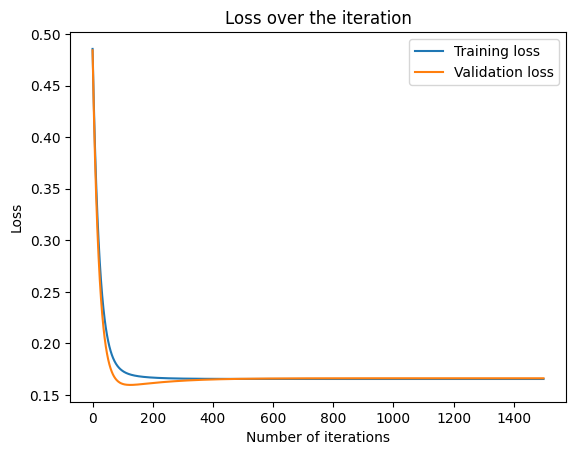

In [72]:
plt.plot([x for x in range(iterations)],t_cost2by1p,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2by1p,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()